In [1]:
import numpy as np
import pandas as pd
import matplotlib

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
matplotlib.rc('text', usetex=True)
matplotlib.rcParams.update({"font.size":16})
import os
import sys

sys.path.append(os.path.abspath('../..'))
from modules import io

In [2]:
CSV = "/media/marsdenlab/Data1/UQ/0110/csv/tube.csv"

df = pd.read_csv(CSV)
print(df.columns)

Index(['Unnamed: 0', 'area', 'generation', 'length', 'mesh', 'model', 'nx',
       'ny', 'nz', 'point', 'pressure_00400_0', 'pressure_00400_0_boundary',
       'radius_actual', 'radius_supplied', 'vWSS_00400_0',
       'vWSS_00400_0_boundary', 'vWSS_00400_1', 'vWSS_00400_1_boundary',
       'vWSS_00400_2', 'vWSS_00400_2_boundary', 'velocity_00400_0',
       'velocity_00400_0_boundary', 'velocity_00400_1',
       'velocity_00400_1_boundary', 'velocity_00400_2',
       'velocity_00400_2_boundary', 'x', 'y', 'z'],
      dtype='object')


In [13]:
generations = [1,2,3,4]
meshes = ['coarse','medium','fine']
label  = 'vWSS_00400_0_boundary'
label_plot = label.replace('_',' ')
arrays = []
for g in generations:
    for m in meshes:
        data = df.loc[(df['mesh']==m) & (df['generation']==g)]
        
        models = list(data['model'].unique())
        x = list(data['point'].unique())
        
        Nx = len(x)
        Nm = len(models)
        Y  = np.zeros((Nm,Nx))
        for i,m in enumerate(models):
            y    = data.loc[data['model']==m][label].values
            Y[i] = y
        
        arrays.append( (g,m,models,x,Y) )

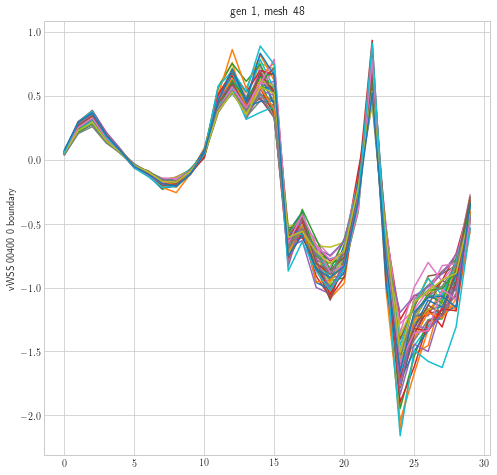

In [14]:
g,m,models,x,Y = arrays[0]

plt.figure(figsize=(8,8))
plt.title('gen ' + str(g) +', mesh '+str(m))
plt.plot(Y.T, label=label_plot)
plt.ylabel(label_plot)
plt.show()

[0.01666668 0.04557182 0.06486932 0.03763435 0.01711581 0.01548339
 0.022886   0.04477326 0.0464396  0.02336541 0.0333504  0.1007565
 0.14769529 0.12988265 0.21976518 0.25344673 0.16470859 0.11648416
 0.17503889 0.21083678 0.17009955 0.12842473 0.24200645 0.214866
 0.42879959 0.31703467 0.33069229 0.28942961 0.27883812 0.14022626]


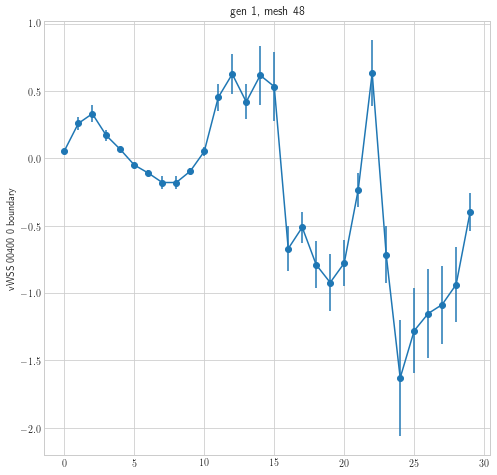

In [15]:
mu  = np.mean(Y,axis=0)
#sig = np.amax(Y,axis=0)-np.amin(Y,axis=0) 
sig = np.std(Y,axis=0)*2
print(sig)
plt.figure(figsize=(8,8))
plt.title('gen ' + str(g) +', mesh '+str(m))
plt.errorbar(x,y=mu, yerr=sig, fmt='-o')
plt.ylabel(label_plot)
plt.show()